### Algorithm
1. Start座標, Goal座標決定
1. Start座標をMedial axis座標リストに追加、Start座標をCurrent座標とする
1. カCurrent座標がGoal座標かどうか判定 -> Goal座標であれば終了
1. Start座標の周り8ピクセル走査、True且つ前のCurrent座標ではない座標を新しいCurrent座標にする
1. Current座標をMedial axis座標リストに追加

上記繰り返す

※まだ画像の縁などの判定をしていない

In [1]:
%matplotlib inline
import numpy as np
from skimage.morphology import medial_axis
import matplotlib.pyplot as plt

In [2]:
# 2値画像読み込み
from PIL import Image

def load_bool_image(fname='./onestroke.png'):
    im = Image.open(fname)
    gray_im = im.convert('L')
    
    arr = np.asarray(gray_im)
    arr.flags.writeable = True
    arr[arr!=255]=True
    arr[arr==255]=False

    return arr.astype(bool)

In [3]:
def plot_array(arr, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.imshow(arr, cmap='Greys',  interpolation='nearest')
    plt.axis('on')
    plt.show()

In [4]:
data = load_bool_image()
skel = medial_axis(data)

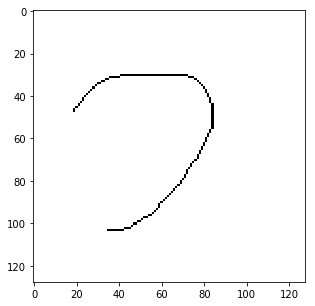

In [5]:
plot_array(skel)

In [6]:
# 端点抽出
from scipy import ndimage

def get_end_points(arr):
    kernel = np.array([[1,1,1],
                       [1,10,1],
                       [1,1,1]])
    filtered = ndimage.convolve(arr.astype(np.float32),
                                kernel, mode='constant', cval=0.0)
    
    out = np.zeros_like(skel)
    out[np.where(filtered==11)] = 1
    
    return out

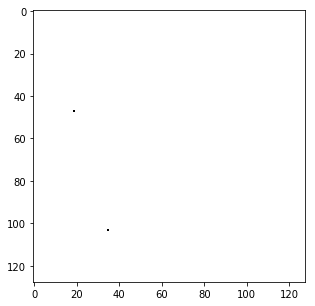

In [7]:
end_points = get_end_points(skel)
plot_array(end_points)

In [8]:
def is_next_coord(bin_im, scan_coord, exc_coord):
    if np.array_equal(bin_im[scan_coord[0], scan_coord[1]], True):
        if not np.array_equal(scan_coord, exc_coord):
            return True
    else:
        return False

def get_next_coord(skel_im, prev_coord, curr_coord):
    left = [curr_coord[0], curr_coord[1]-1]
    if is_next_coord(skel_im, left, prev_coord):
        return left
    
    upper_left = [curr_coord[0]-1, curr_coord[1]-1]
    if is_next_coord(skel_im, upper_left, prev_coord):
        return upper_left
    
    upper = [curr_coord[0]-1, curr_coord[1]]
    if is_next_coord(skel_im, upper, prev_coord):
        return upper
    
    upper_right = [curr_coord[0]-1, curr_coord[1]+1]
    if is_next_coord(skel_im, upper_right, prev_coord):
        return upper_right
    
    right = [curr_coord[0], curr_coord[1]+1]
    if is_next_coord(skel_im, right, prev_coord):
        return right
    
    lower_right = [curr_coord[0]+1, curr_coord[1]+1]
    if is_next_coord(skel_im, lower_right, prev_coord):
        return lower_right
    
    lower = [curr_coord[0]+1, curr_coord[1]]
    if is_next_coord(skel_im, lower, prev_coord):
        return lower
    
    lower_left = [curr_coord[0]+1, curr_coord[1]-1]
    if is_next_coord(skel_im, lower_left, prev_coord):
        return lower_left
    

In [9]:
# Start と Goal 座標を取得
start_coord, goal_coord = np.argwhere(end_points)
print('Start\t', start_coord)
print('Goal\t', goal_coord)

Start	 [47 19]
Goal	 [103  35]


In [10]:
import copy

def get_medial_axis_coord_list(start_coord, goal_coord, loop_limit=1000):
    '''
    loop_limit: エラーの時、無限ループ防ぐため
    '''
    
    medial_axis_coord_list = [start_coord.tolist()]
    prev_coord = np.zeros(2)
    curr_coord = copy.deepcopy(start_coord)

    count = 0
    while not np.array_equal(curr_coord, goal_coord):
        count+=1
        if count > loop_limit:
            break

        candidate_coord = get_next_coord(skel, prev_coord, curr_coord)
        prev_coord = copy.deepcopy(curr_coord)
        curr_coord = copy.deepcopy(candidate_coord)
        medial_axis_coord_list.append(curr_coord)
    
    return np.array(medial_axis_coord_list)


In [11]:
medial_axis_coord_list = get_medial_axis_coord_list(start_coord, goal_coord)
print(medial_axis_coord_list)

[[ 47  19]
 [ 46  19]
 [ 45  20]
 [ 44  21]
 [ 43  22]
 [ 42  23]
 [ 41  23]
 [ 40  24]
 [ 39  25]
 [ 38  26]
 [ 37  27]
 [ 36  28]
 [ 35  29]
 [ 34  30]
 [ 34  31]
 [ 33  32]
 [ 33  33]
 [ 32  34]
 [ 32  35]
 [ 31  36]
 [ 31  37]
 [ 31  38]
 [ 31  39]
 [ 31  40]
 [ 30  41]
 [ 30  42]
 [ 30  43]
 [ 30  44]
 [ 30  45]
 [ 30  46]
 [ 30  47]
 [ 30  48]
 [ 30  49]
 [ 30  50]
 [ 30  51]
 [ 30  52]
 [ 30  53]
 [ 30  54]
 [ 30  55]
 [ 30  56]
 [ 30  57]
 [ 30  58]
 [ 30  59]
 [ 30  60]
 [ 30  61]
 [ 30  62]
 [ 30  63]
 [ 30  64]
 [ 30  65]
 [ 30  66]
 [ 30  67]
 [ 30  68]
 [ 30  69]
 [ 30  70]
 [ 30  71]
 [ 30  72]
 [ 31  73]
 [ 31  74]
 [ 31  75]
 [ 32  76]
 [ 33  77]
 [ 34  78]
 [ 35  79]
 [ 36  80]
 [ 37  81]
 [ 38  81]
 [ 39  82]
 [ 40  82]
 [ 41  83]
 [ 42  83]
 [ 43  83]
 [ 44  84]
 [ 45  84]
 [ 46  84]
 [ 47  84]
 [ 48  84]
 [ 49  84]
 [ 50  84]
 [ 51  84]
 [ 52  84]
 [ 53  84]
 [ 54  84]
 [ 55  84]
 [ 56  83]
 [ 57  83]
 [ 58  82]
 [ 59  82]
 [ 60  81]
 [ 61  81]
 [ 62  80]
 [ 63  80]